In [1]:
import os
root_dir = os.path.dirname(os.path.abspath(os.curdir)) 
print(root_dir)

D:\file\JupyterFile\Data1030\Data1030-FinalProject


# Introduction

In [2]:
import pandas as pd
data = pd.read_csv(root_dir+"/data/BankChurners.csv")
data.head()
#there are 20 features and 10127 data points

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
import matplotlib.pyplot as plt

**1. What problem are you trying to solve?**  

A manager at the bank is disturbed with more and more customers leaving their credit card services.The problem I am trying to solve is to predict for the bank managers based on the given data about the "churned customers" so these bank managers can proactively go to the customer to provide them better services and turn customers' decision in the opposite direction. 


**2. the target variable is "Attribution_Flag" column** 

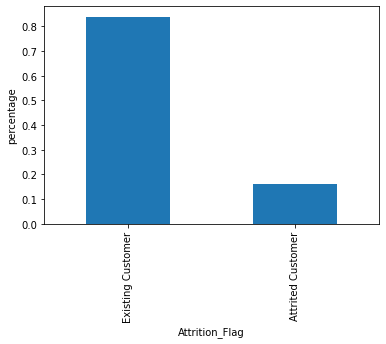

In [16]:
pd.value_counts(data['Attrition_Flag'],normalize=True).plot.bar()
plt.xlabel("Attrition_Flag")
plt.ylabel("percentage")
plt.savefig(root_dir+"/figures/Attrition_Flag.png",transparent = True,bbox_inches='tight',dpi = 300)
plt.show()
#Attrited customer is the "churned" customer and the its proportion is about 16.07%. So it is an imbalanced dataset.
#It is a typical classification task.

**3. Why is it interesting/important? and where does it come from?**

Predicting churn is very important especially when clear customer feedback is absent. Retaining existing customers and thereby increasing their lifetime value is something everyone acknowledges as being important, however there is little the bank managers can do about customer churn if they don't see it coming in the first place.So this is where predicting churn has its value. Early and accurate churn prediction empowers CRM and customer experience teams to be creative and proactive in their engagement with the customer. In fact, by simply reaching out to the customer early enough, 11% of the churn can be avoided.
#link: https://www.tigeranalytics.com/blog/addressing-customer-churn-in-banking/

The data come from LEAPS and the link is https://leapsapp.analyttica.com/cases/11

**4. Size of the data? Is it i.i,d.?**

In [17]:
data.shape

(10127, 21)

There are 20 features and 10127 data points since it is mentioned that the last two columns should be dropped

**5. What are the columns?**

'CLIENTNUM' is the client number, a unique identifier for the customer holding the account.It is a continous numerical feature,and one data point only has one client number which means that every data point represents the data of one unique customer.

<AxesSubplot:>

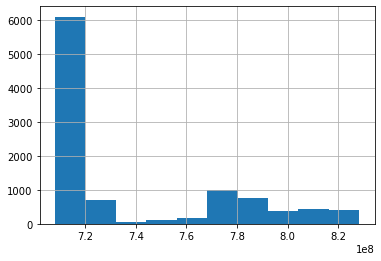

In [18]:
data['CLIENTNUM'].hist()

In [21]:
len(data['CLIENTNUM'].unique())

10127

### Demographic variables

'Customer_Age' is a demographic variable and measures the customer's age in years.It is a continuous numerical feature too and nearly normally distributed.

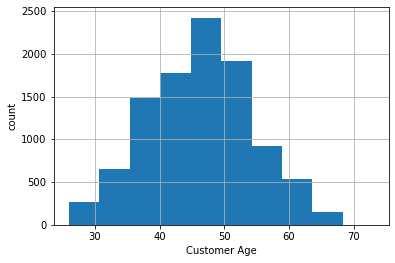

In [43]:
data['Customer_Age'].hist()
plt.xlabel("Customer Age")
plt.ylabel('count')
plt.show()

'Gender' is also a demographic variable with F representing female and M representing male. It is a categorical feature without order and it distributed rather fairly.

In [30]:
data['Gender'].value_counts()/data.shape[0]

F    0.529081
M    0.470919
Name: Gender, dtype: float64

'Dependent_count' represents the number of dependents one customer has. It is a discrete numerical feature.

Text(0, 0.5, 'percentage')

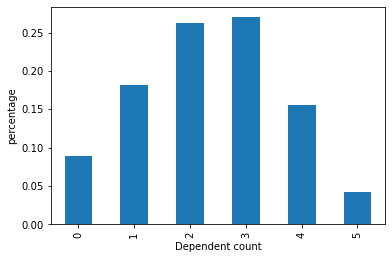

In [76]:
(data['Dependent_count'].value_counts()/data.shape[0]).sort_index().plot(kind = 'bar')
plt.xlabel("Dependent count")
plt.ylabel('percentage')

'Education_level' is the educational qualification of the account holder. It is a categorical feature with orders and its categories are ['Uneducated','High School','College','Graduate','Doctorate','Post-Graduate','Unknown']. And in this column, large percent of customers are graduates and only a few are post-graduate or doctorate. Also, it worths notice that there is a value called 'Unknown' which is the missing value in educational level and needed to be dealt with in data preprocessing.

In [36]:
data['Education_Level'].value_counts()/data.shape[0]

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

'Marital_status' is an orderless categorical feature with ['Married','Single','Divorced' and 'Unknown'] as its catogories. And most customers are married or single. There are also unknown values in this column which are also needed to be treated in data preprocessing.

In [37]:
data['Marital_Status'].value_counts()/data.shape[0]

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

'Income_Category' is an ordered categorical feature with ['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'] as its categories. 

In [38]:
data['Income_Category'].value_counts()/data.shape[0]

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

### Product Variable

'Card_Category' describes the cards that customers have. It is a ordered categorcial deature with ['Blue','Silver','Gold','Platinum'] as its categories.

In [39]:
data['Card_Category'].value_counts()/data.shape[0]

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

'Months_on_book' describes the period of the customer' relationship with bank. It is a continuous numerical feature and it is also nearly normally distributed.

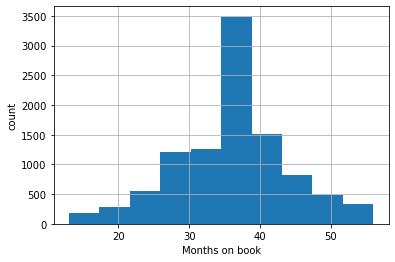

In [41]:
data['Months_on_book'].hist()
plt.xlabel('Months on book')
plt.ylabel('count')
plt.show()

'Total_Relationship_Count' describes the number of products held by the customer. It is a discrete numerical feature

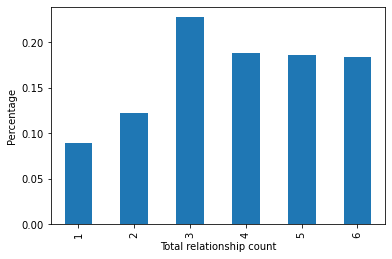

In [77]:
(data['Total_Relationship_Count'].value_counts()/data.shape[0]).sort_index().plot(kind = 'bar')
plt.xlabel("Total relationship count")
plt.ylabel("Percentage")
plt.show()

'Months_Inactive_12_mon' is the number of months inactive in the last 12 months. It is a discrete numerical feature

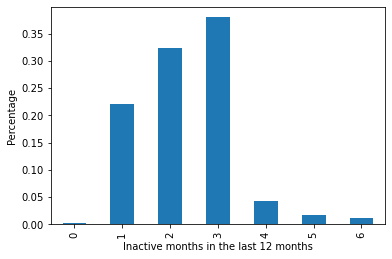

In [78]:
(data['Months_Inactive_12_mon'].value_counts()/data.shape[0]).sort_index().plot(kind = 'bar')
plt.xlabel("Inactive months in the last 12 months")
plt.ylabel("Percentage")
plt.show()

'Contacts_Count_12_mon' is the number of contacts between the customer and the bank manager in the last 12 months. It is also a discrete numerical feature

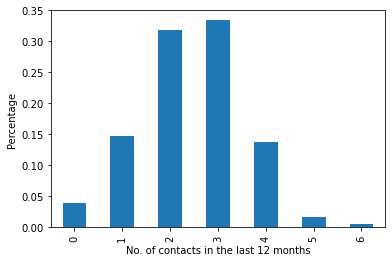

In [79]:
(data['Contacts_Count_12_mon'].value_counts()/data.shape[0]).sort_index().plot(kind = 'bar')
plt.xlabel("No. of contacts in the last 12 months")
plt.ylabel("Percentage")
plt.show()

'Credit_Limit' is the limit on the credit card. It is a continuous numerical feature.

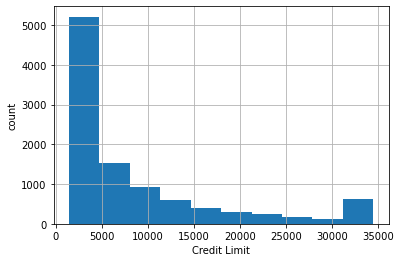

In [81]:
data['Credit_Limit'].hist()
plt.xlabel("Credit Limit")
plt.ylabel("count")
plt.show()

'Total_Revolving_Bal' is the total revolving balance on the credit card and it is a continuous numerical feature

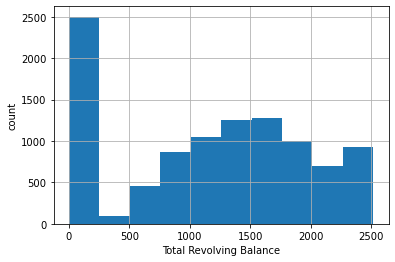

In [83]:
data['Total_Revolving_Bal'].hist()
plt.xlabel("Total Revolving Balance")
plt.ylabel("count")
plt.show()

 'Avg_Open_To_Buy' is the average amount left in the customer's credit card to use and is a continuous numerical feature

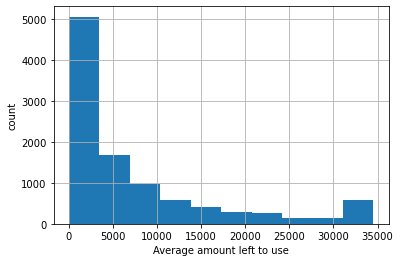

In [95]:
data['Avg_Open_To_Buy'].hist()
plt.xlabel("Average amount left to use")
plt.ylabel("count")
plt.show()

'Total_Amt_Chng_Q4_Q1' measures the change of the transaction amount of Q4 over Q1 and is a continuous numerical feature

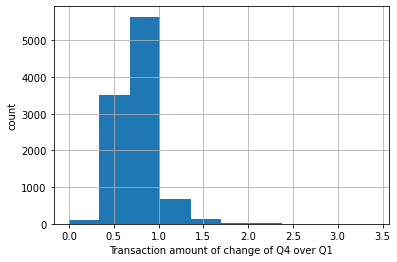

In [86]:
data['Total_Amt_Chng_Q4_Q1'].hist()
plt.xlabel("Transaction amount of change of Q4 over Q1")
plt.ylabel("count")
plt.show()

'Total_Trans_Amt' describes the total transaction amount over the last 12 months and is a continuous numerical feature

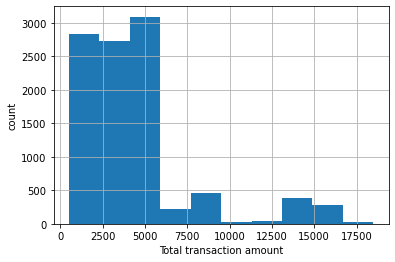

In [87]:
data['Total_Trans_Amt'].hist()
plt.xlabel("Total transaction amount")
plt.ylabel("count")
plt.show()

'Total_Trans_Ct' measures the total transaction count over the last 12 months and is a continuous numerical feature

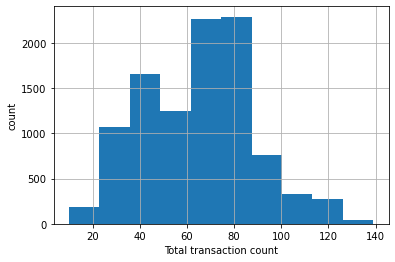

In [90]:
data['Total_Trans_Ct'].hist()
plt.xlabel("Total transaction count")
plt.ylabel("count")
plt.show()

'Total_Ct_Chng_Q4_Q1' measures the change in transaction count of Q4 over Q1 and is a continuous numerical feature

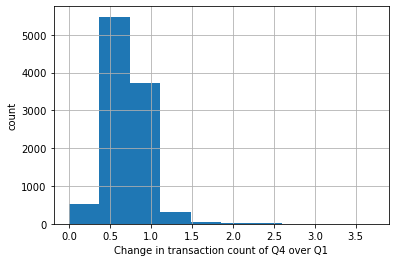

In [92]:
data['Total_Ct_Chng_Q4_Q1'].hist()
plt.xlabel("Change in transaction count of Q4 over Q1")
plt.ylabel("count")
plt.show()

'Avg_Utilization_Ratio' measures the average card utilization ratio which equals to (credit card spent + money withdrawal)/(Total available limit for credit card spends + Total money withdrawal limit) and is a continuous numerical feature

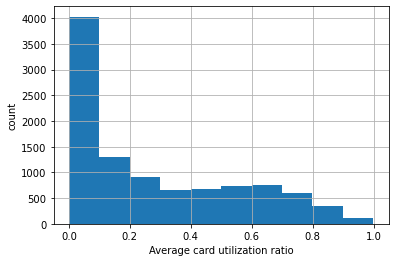

In [93]:
data['Avg_Utilization_Ratio'].hist()
plt.xlabel("Average card utilization ratio")
plt.ylabel("count")
plt.show()

**6.Write a short description about 2-3 public projects or publications where the data has been used, what did the authors find, what ML question did they solve and how successful they were.**

For this data, there are two main tasks, one is to improve the performance of predicting churned customers while the other is to find the most influential factors that make the customers "churn". However finding the factors that matter most is a common strategy when enhancing the model performance so I rather treat them as a same task. And there are several projects that have already been done to solve this problem and achieve good results.
Thomas used SMOTE which is an approach to address imbalanced datasets by oversampling the minority class and found great improvement when processing the data generated by this strategy. The result showed that compared to the raw data, this new data could improve the F1 score from average 0.6 to average 0.9. Thomas also made a model comparison among Random Forest, Adaboost and SVM and found that Random Forest model with SMOTE has the best F-1 score(0.91).
https://www.kaggle.com/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction
Andi looked into the details about the raw data and made five interesting assumptions about the relationship of the features with the target variable. he found that the likelihood of the customers' leaving is related to the money they spend annually, the months of inactivity in their bank account and their credit limit.The result also showed that age seemed of no use in predicting and almost all churned customers used their cards below 100 times.As for the classification models, Andi used Random Forest and SVM as well but replaced Adaboost with Gradient boosting and achieved 95% accuracy and 85% recall rate.
https://www.kaggle.com/paotografi/customer-churn-eda-95-acc-and-85-recall
Joseph used Random Forest and LightGBM to predict with 97% recall and 95% accuracy and plotted the importance of these features. The result showed that both transaction amount and transaction count ranked top. So we need to look these features thoroughly when doing exploratory data analysis.
https://www.kaggle.com/josephchan524/bankchurnersclassifier-recall-97-accuracy-95



# EDA

### The relationship of each feature with target variable

In [4]:
con_fea = ['CLIENTNUM','Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
dis_fea = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',]
cat_fea = ['Gender','Marital_Status']
ord_fea = ['Education_Level','Income_Category','Card_Category']
categories = data['Attrition_Flag'].unique()

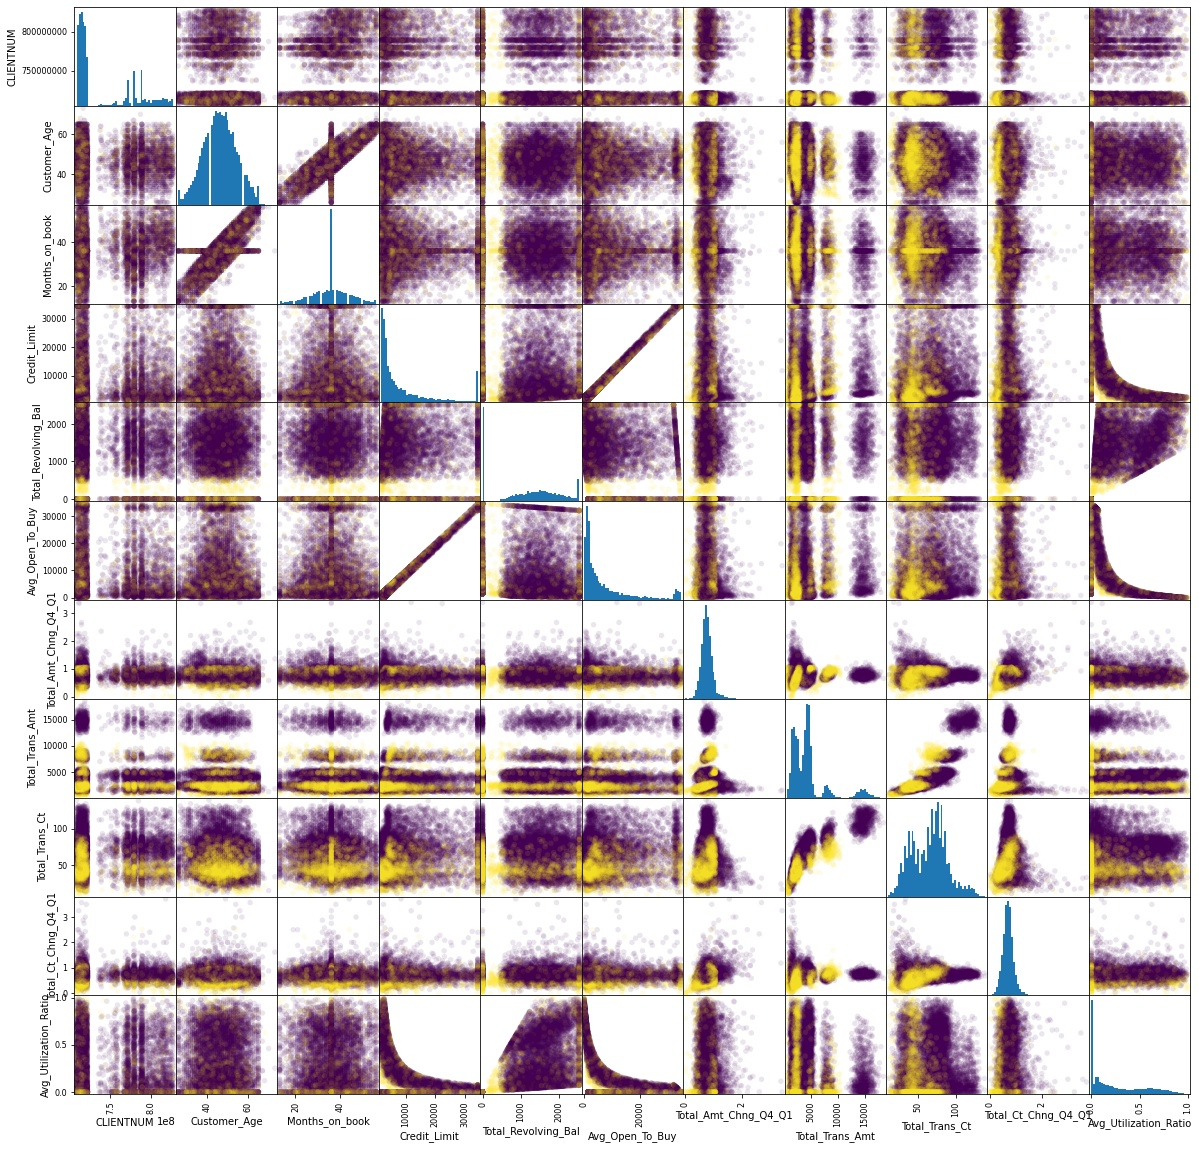

In [9]:
pd.plotting.scatter_matrix(data[con_fea], figsize=(20, 20), marker='o',hist_kwds={'bins': 50}, 
                           c = pd.get_dummies(data['Attrition_Flag']).iloc[:,0],s=30, alpha=.1)
plt.savefig(root_dir+"\\figures\\scatterplot.png",transparent = True,bbox_inches='tight',dpi=300)
plt.show()

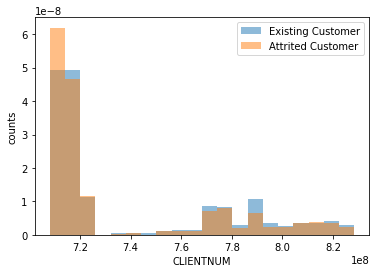

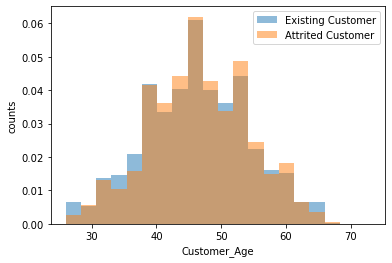

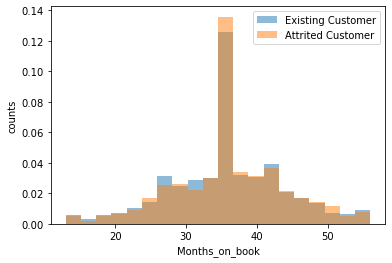

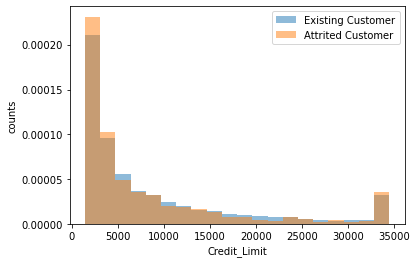

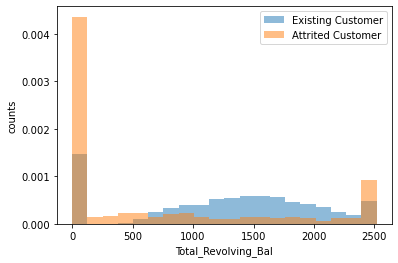

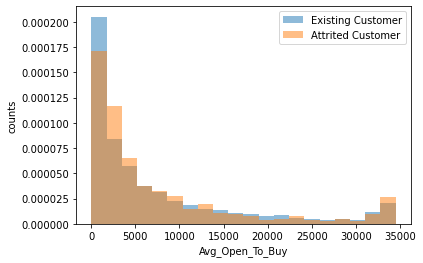

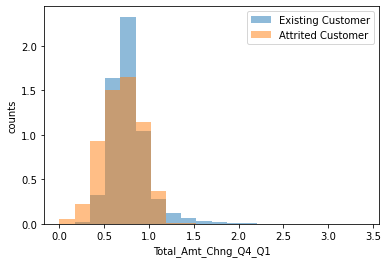

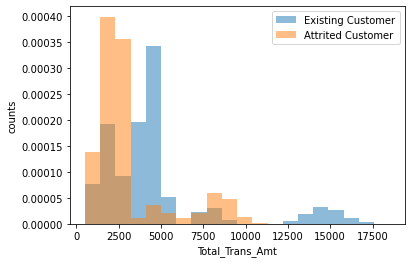

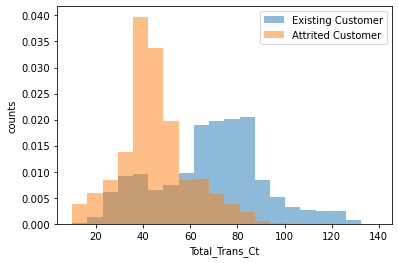

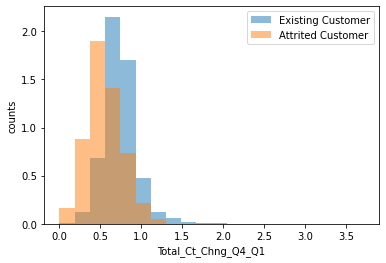

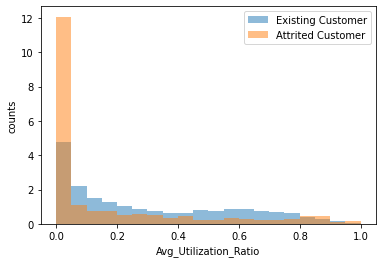

In [10]:

for feature in con_fea:
    bin_range = (data[feature].min(),data[feature].max())
    for c in categories:
        plt.hist(data[data['Attrition_Flag']==c][feature],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('counts')
    plt.xlabel(feature)
    plt.savefig(root_dir+"\\figures\\feature_and_target_variable\\{}_and_Attrition_Flag.png".format(feature),transparent = True,
                dpi = 300,bbox_inches='tight')
    plt.show()


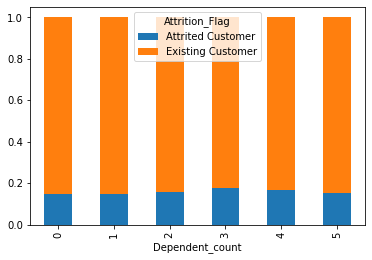

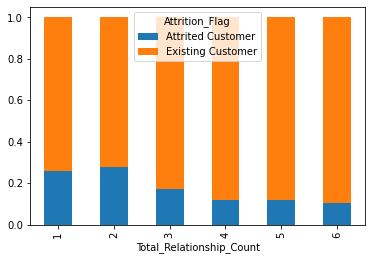

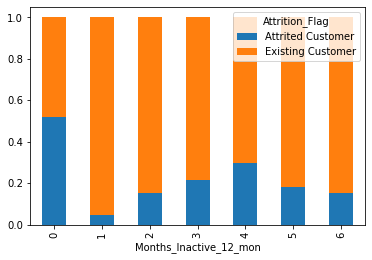

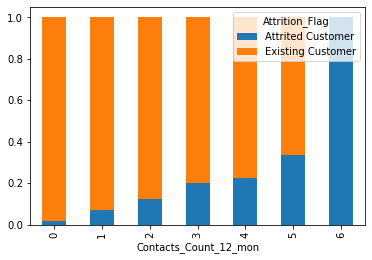

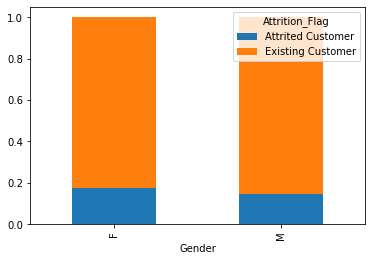

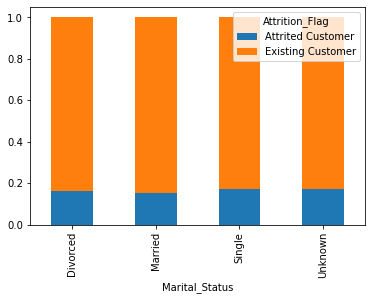

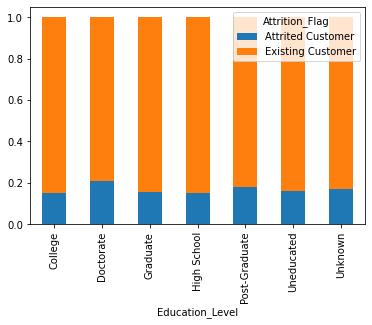

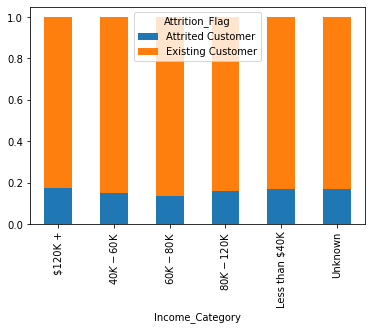

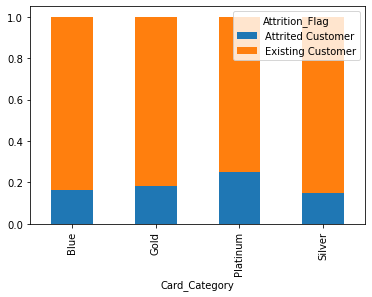

In [11]:
for feature in dis_fea+cat_fea+ord_fea:
    count_matrix = data.groupby([feature, 'Attrition_Flag']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.savefig(root_dir+"/figures/feature_and_target_variable/{} and Attrition_Flag.png".format(feature),transparent = True,
                dpi = 300,bbox_inches='tight')
    plt.show()

### The distribution of every features

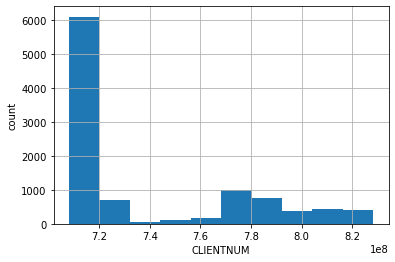

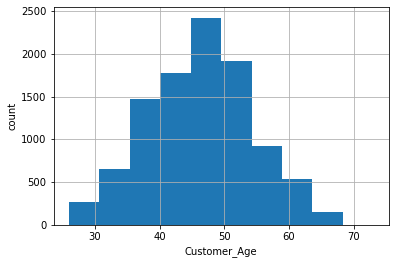

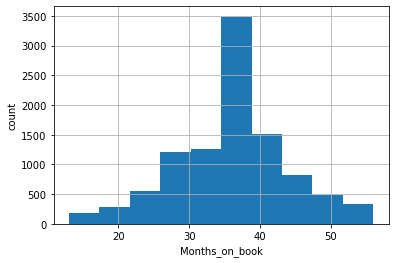

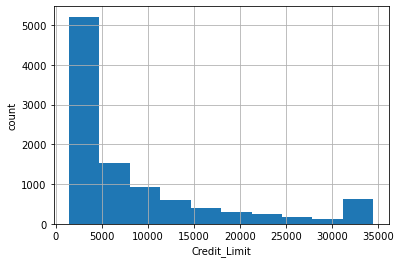

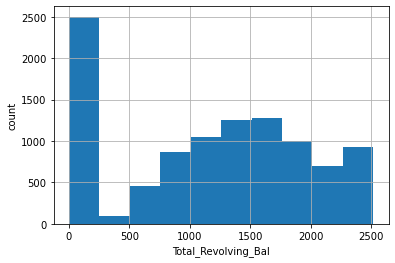

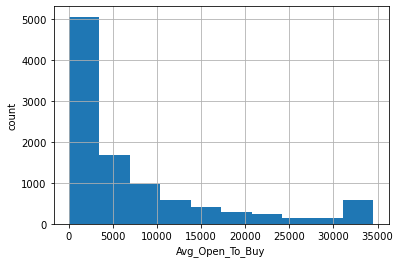

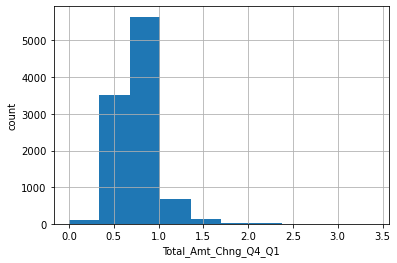

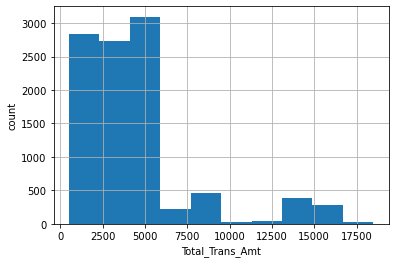

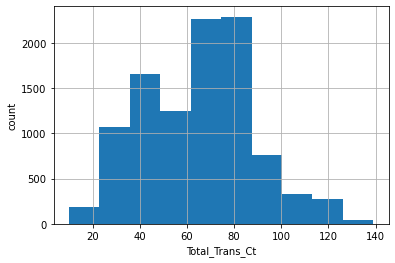

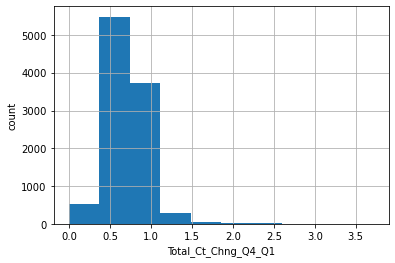

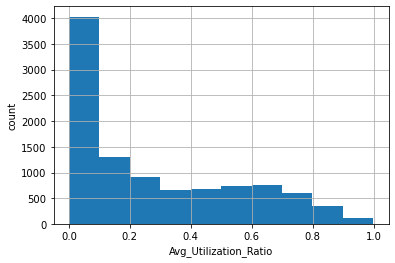

In [19]:
for feature in con_fea:
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.savefig(root_dir+"/figures/feature_distribution/{}.png".format(feature),transparent = True,dpi = 300)
    plt.show()

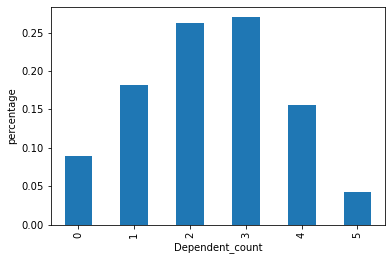

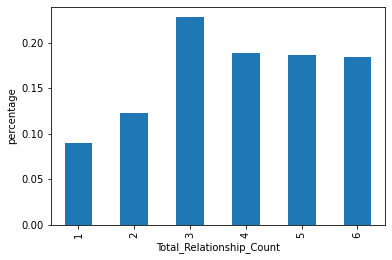

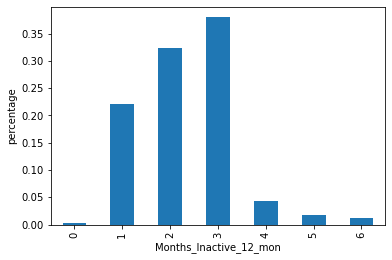

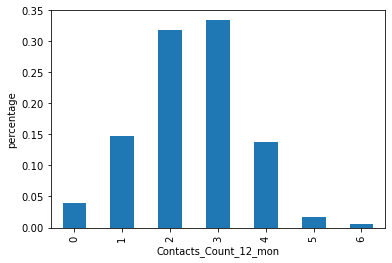

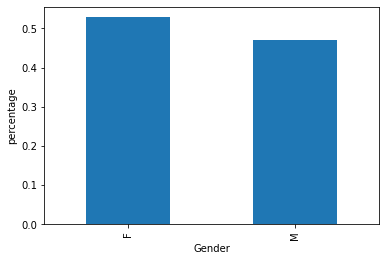

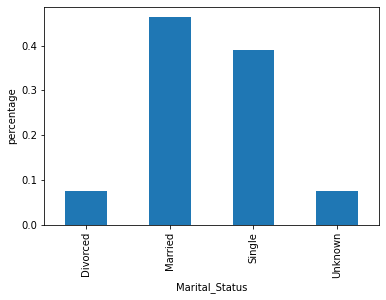

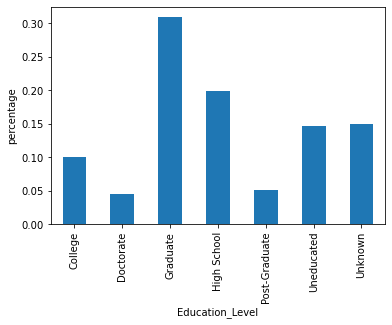

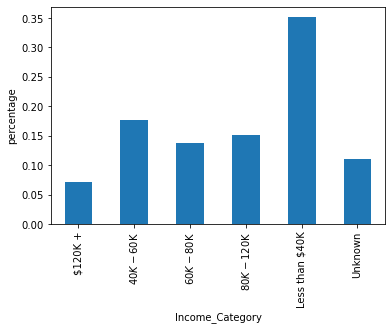

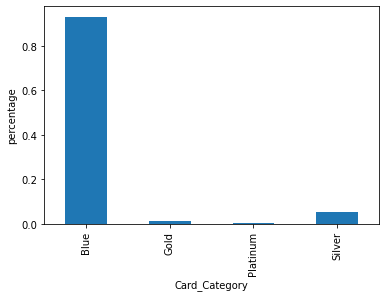

In [12]:
for feature in dis_fea+cat_fea+ord_fea:
    (data[feature].value_counts()/data.shape[0]).sort_index().plot(kind = 'bar')
    plt.xlabel(feature)
    plt.ylabel('percentage')
    plt.savefig(root_dir+"/figures/feature_distribution/{}.png".format(feature),transparent = True,bbox_inches='tight',dpi = 300)
    plt.show()

# Preprocessing

In [11]:
#data splitting
X = data[[column for column in data.columns if column != 'Attrition_Flag']]
y = data['Attrition_Flag']
from sklearn.model_selection import train_test_split
random_state = 43

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)


This dataset is not IID since all features are not identically distributed. But luckily, it does not have group structure, nor does it have time-series data.The trick thing about this dataset is that it is imbalanced, so I am going to use stratify method when splitting. The train size will be set as 0.6 and the val size as well as test size both as 0.2 which is the same as how people normally splitted their data.

For discrete numerical features(dis_fea), I am going to treat them as ordinal features and since they are already in numerical form, they can be put into the model already.
I am going to use OneHotEncoder to treat with the features in the cat_fea because there is no ordinal information contained in these features and it is not sensible if we put gender and marital status as ordinary features.
For features in ord_fea, I am going to use OrdinalEncoder because it is obvious that there are ordinal information contained in educational level, income category and card category.

For continous numerical feature(con_fea), I am going to use StandardScaler.Since in these columns,'Customer_Age', 'Monts_on_book','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1' and 'Total_Amt_Chng_Q4_Q1' are nearly normaly distributed though some are skewed while other features have long tails which are not suitable to use MinMaxScaler.



In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
# from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#ordinal encoder
ord_cats =[['Uneducated','High School','College','Graduate','Doctorate','Post-Graduate','Unknown'],
           ['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'], 
           ['Blue','Silver','Gold','Platinum']
          ]

ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories = ord_cats))])
onehot_transformer = Pipeline(steps = [('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ord_fea),
        ('cat', onehot_transformer, cat_fea),
        ('num', numeric_transformer, con_fea)
        ]
)


#fit_transform the training set
X_prep = preprocessor.fit_transform(X_train[ord_fea+cat_fea+con_fea])

feature_names = preprocessor.transformers_[0][-1]+\
                list(preprocessor.named_transformers_['cat'][0].get_feature_names(cat_fea))+\
                preprocessor.transformers_[2][-1]
    

df_train = pd.concat([pd.DataFrame(data=X_prep,columns=feature_names),X_train[dis_fea]],axis=1)
print(df_train.shape)

df_CV = preprocessor.transform(X_val[ord_fea+cat_fea+con_fea])
df_CV = pd.concat([pd.DataFrame(data=df_CV,columns = feature_names),X_val[dis_fea]],axis=1)
print(df_CV.shape)

df_test = preprocessor.transform(X_test[ord_fea+cat_fea+con_fea])
df_test = pd.concat([pd.DataFrame(data=df_test,columns = feature_names),X_test[dis_fea]],axis=1)
print(df_test.shape)
print(feature_names)

(8477, 24)
(3649, 24)
(3644, 24)
['Education_Level', 'Income_Category', 'Card_Category', 'Gender_F', 'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown', 'CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [13]:
print(df_train.head(),"\n",df_CV.head(),"\n",df_test.head())

   Education_Level  Income_Category  Card_Category  Gender_F  Gender_M  \
0              3.0              4.0            0.0       0.0       1.0   
1              3.0              1.0            0.0       0.0       1.0   
2              1.0              1.0            0.0       0.0       1.0   
3              0.0              0.0            1.0       1.0       0.0   
4              2.0              5.0            0.0       1.0       0.0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     1.0                    0.0   
1                      0.0                     1.0                    0.0   
2                      0.0                     1.0                    0.0   
3                      0.0                     1.0                    0.0   
4                      0.0                     0.0                    1.0   

   Marital_Status_Unknown  CLIENTNUM  ...  Avg_Open_To_Buy  \
0                     0.0  -0.

In [16]:
#y encoder: Since y is string, so it is better to use label encoder when dealing with target variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(y_train)
yval = le.transform(y_val)
ytest = le.transform(y_test)
print(ytrain,yval,ytest)

[1 1 1 ... 1 1 1] [0 1 0 ... 1 1 1] [1 0 1 ... 1 1 1]


**4. Choose an evaluation metrix**

Precision-Recall metrix -> more emphasis on recall since it is more affordable to treat a non-churned customer as a churned customer than other way around

**5. Choose one or more ML techniques**

Logistic regression(lasso, Ridge, Elasticnet), Random Forest, SVC, XGBoost

Linearly correlation? Do we need to deal with it? Scatter plot?

Drop the feature with highly correlation -> pearson correlation

**6. Tune the hyperparameter**

**7. Interpret the model**

Find the most important features -> Choose the best model
1. coefficient of linear models
2. permutation of the features.
3.shap ->local feature importance (technique)

Baseline accuracy -> proportion of the major class 